<a href="https://colab.research.google.com/github/YuriiSulima/ZnSe-PiB/blob/main/ZnSe_PiB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

# Constants
hbar = 1.0545718e-34  # Reduced Planck's constant (J·s)
m0 = 9.10938356e-31   # Electron rest mass (kg)
eV_to_J = 1.60218e-19 # eV to Joules conversion

# Material-specific constants for ZnSe QDs
m_e_eff = 0.21 * m0  # Effective mass of electron in ZnSe
m_h_eff = 0.6 * m0  # Effective mass of hole in ZnSe

E_bulk = 2.7 # eV

# Function to calculate energy levels in a spherical quantum dot
def energy_level_ZnSe_QD(radius_nm, n=1, l=1):
    """
    Calculates the energy of a confined particle in a spherical ZnSe quantum dot.

    Parameters:
    - radius_nm: Radius of the ZnSe QD in nanometers
    - n: Principal quantum number (radial quantum number)
    - l: Orbital angular momentum quantum number

    Returns:
    - Energy (in eV) of the electron and hole states in the QD
    """
    # Convert radius to meters
    R = radius_nm * 1e-9

    # Quantum confinement energy for electron
    E_electron = (hbar**2 * np.pi**2) / (2 * m_e_eff * R**2) * (n + l)**2 / eV_to_J

    # Quantum confinement energy for hole
    E_hole = (hbar**2 * np.pi**2) / (2 * m_h_eff * R**2) * (n + l)**2 / eV_to_J

    # Total energy shift due to quantum confinement
    E_total = E_electron + E_hole

    return E_electron, E_hole, E_total

# Example: Energy levels for a ZnSe QD with radius 3 nm
radius_nm = 4.8  # Quantum dot radius in nanometers
energy_electron, energy_hole, total_energy_shift = energy_level_ZnSe_QD(radius_nm)

energy_electron, energy_hole, total_energy_shift
total_energy = E_bulk + total_energy_shift
print(total_energy) # eV
wavelength = 1240 / total_energy # nm
print(wavelength)

3.119675631558569
397.4772208546901


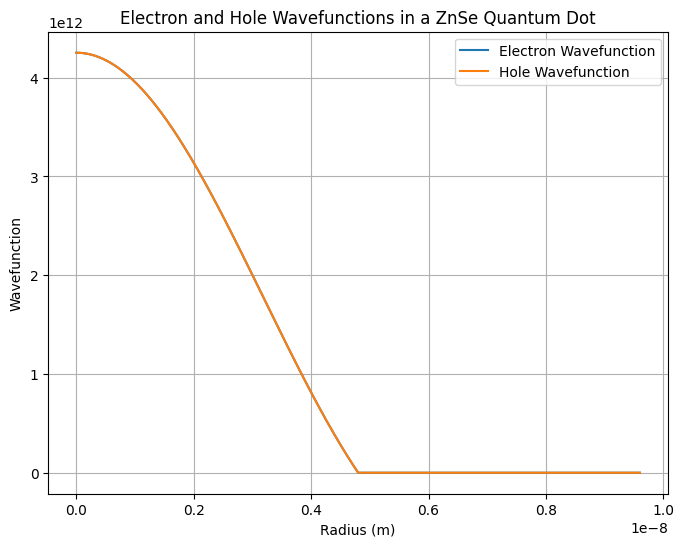

In [ ]:
# prompt: can you plot electron and hole wavefunctions based on the data from the previous cell

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import spherical_jn

# Define the radial wavefunction for a spherical quantum dot
def radial_wavefunction(r, n, l, R):
    """
    Calculates the radial wavefunction for a particle in a spherical quantum dot.

    Parameters:
    - r: Radial coordinate (in meters)
    - n: Principal quantum number (radial quantum number)
    - l: Orbital angular momentum quantum number
    - R: Radius of the quantum dot (in meters)

    Returns:
    - The radial wavefunction at the given radius
    """
    if r <= R:
        return spherical_jn(l, np.pi * r / R) * np.sqrt(2 / R**3)
    else:
        return 0

# Parameters
R = radius_nm * 1e-9 # Radius in meters
n = 1
l = 0

# Create an array of radial coordinates
r_array = np.linspace(0, 2 * R, 500)

# Calculate the electron and hole wavefunctions
electron_wavefunction = [radial_wavefunction(r, n, l, R) for r in r_array]
hole_wavefunction = [radial_wavefunction(r, n, l, R) for r in r_array]


# Plot the wavefunctions
plt.figure(figsize=(8, 6))
plt.plot(r_array, electron_wavefunction, label='Electron Wavefunction')
plt.plot(r_array, hole_wavefunction, label='Hole Wavefunction')
plt.xlabel('Radius (m)')
plt.ylabel('Wavefunction')
plt.title('Electron and Hole Wavefunctions in a ZnSe Quantum Dot')
plt.legend()
plt.grid(True)
plt.show()
